## Week 13: Lecture 1

We have been trying to determine unknown quantities. We used estimates from random samples to make guesses about parameters in a population. Hypothesis testing and confidence intervals allowed us to quantify the variability of these estimates across samples. Remember that we gathered data at random from the population through 

- sampling 
- simulation 
- resampling

We can try to improve the guesses through assumptions. If we assume some properties of the samples, then can we predict other properties of the sample. Here we try to pass from known information to unknown information. So we will try to understand associations between properties of a sample to make predictions about associations between properties in the population. 

Following an exercise about means, we will look at two ways for measuring association 

- scatter-plots 
- correlations

Think of scatter-plots as a visual measure and correlation as a numerical measure.

In [90]:
# some data science packages

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 8)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (9,7)

# some helpful functions we wrote for you

from helper_functions import *

### Exercise (Standard Deviation Bound)

We have studied different statisitics such as 

- median 
- maximum 
- mean

Among these statistics, the mean is particularly helpful. Regardless of the population, we know some properties about the mean. In particular we can bound the difference between a collection numbers and their mean regardless of their values. 

In [91]:
sat = pd.read_csv('sat2014.csv')
sat

,State,Participation Rate,Critical Reading,Math,Writing,Combined
0,North Dakota,2.3,612,620,584,1816
1,Illinois,4.6,599,616,587,1802
2,Iowa,3.1,605,611,578,1794
3,South Dakota,2.9,604,609,579,1792
4,Minnesota,5.9,598,610,578,1786
...,...,...,...,...,...,...
46,Texas,62.0,476,495,461,1432
47,Maine,95.6,467,471,449,1387
48,Idaho,100.0,458,456,450,1364
49,Delaware,100.0,456,459,444,1359


Here we have summaries of SAT scores for 50 states and the District of Columbia

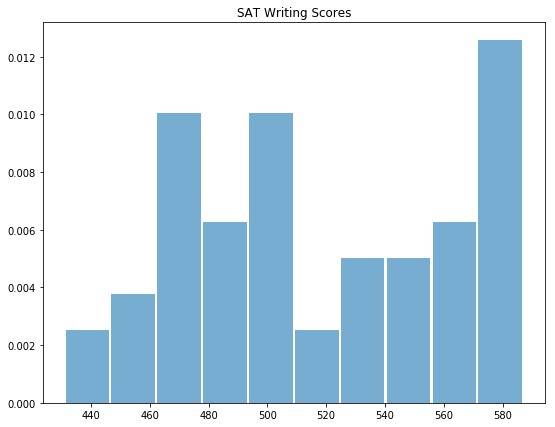

In [92]:
plt.hist(sat['Writing'], density = True, alpha = 0.6, rwidth=0.95)
plt.title('SAT Writing Scores');

We can use the `numpy` package to compute the mean and standard deviation. Note that the package tends to be much faster than loops for calculations.

In [93]:
# access the column of data 

writing_scores = sat['Writing']

# compute the mean
mean_writing_scores = np.mean(writing_scores)

# compute the standard deviation
standard_deviation_writing_scores = np.std(writing_scores)

print(f"Mean is {mean_writing_scores} \nStandard Deviation is {standard_deviation_writing_scores}")

Mean is 517.8627450980392 
Standard Deviation is 45.43731713627982


However loops help use remember the formulas. So calculate the mean and standard deviation of the `Writing` column with loops.

In [1]:
# Calculate the mean

# TRY IT!

In [6]:
# Calculate the standard deviation

# TRY IT!

The standard deviation of the SAT Writing Scores is 45.43731713627982


Remember that standard units come from shifting by the mean and dividing by the standard deviation 

$$\text{Writing} \; \mapsto \; \displaystyle \frac{\text{Writing} - \text{Mean}}{\text{Standard Deviation}}$$

We can write a function to convert to standard units.

In [101]:
def standard_units(x):
    return (x - np.mean(x)) / np.std(x)

We can convert the `Writing` column in the `sat` table.

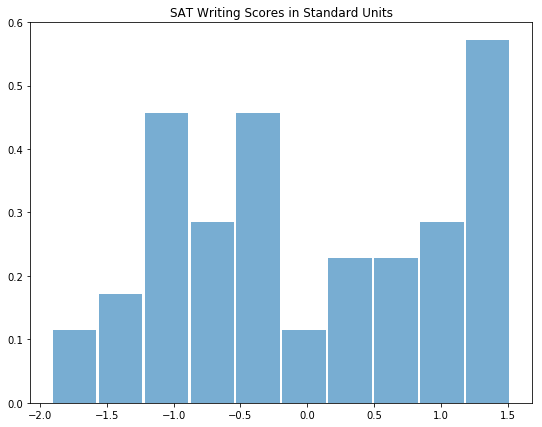

In [102]:
writing_scores_standard_units = standard_units(sat["Writing"])

plt.hist(writing_scores_standard_units, density = True, alpha = 0.6, rwidth=0.95)
plt.title('SAT Writing Scores in Standard Units');

Note that we have not changed the distribution. However the converted scores are positive or negative because some scores are above the mean and some scores are below the mean. Note that the converted scores lie between -2 and 1.5. What does that imply about the variability of numbers around the mean? 

We can use the standard deviation bound to determine a fraction of scores that must be within distance

- 2 standard deviation from the mean
- 3 standard deviations from the mean
- 4 standard deviations from the mean

Since we use distance not difference, we compute 

$$|\text{Writing} - \text{Mean}| \leq z * \text{Standard Deviation}$$

where $z = 1,2,3$. Equivalently 

$$\left|\displaystyle \frac{\text{Writing} - \text{Mean}}{\text{Standard Deviation}}\right| \leq z$$

The standard deviation bound teaches us that the fractions of scores are at least

- $1 - \frac{1}{2^2} = 0.75$
- $1 - \frac{1}{3^2} \approx 0.89$
- $1 - \frac{1}{4^2} \approx 0.94$

Let us verify that all of the scores in the `Writing` column are at distance less than 2 standard deviations from the mean.

In [103]:
bound = 2 

within_bound = []
for coverted_score in writing_scores_standard_units:    
    if abs(coverted_score) <= bound:
        within_bound.append(1)
    else:
        within_bound.append(0)
    
fraction_within_bound = sum(within_bound) / len(within_bound)
fraction_within_bound

1.0

We can try the other columns of `sat`.

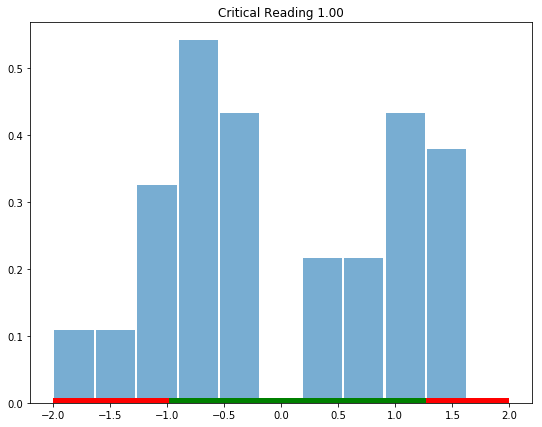

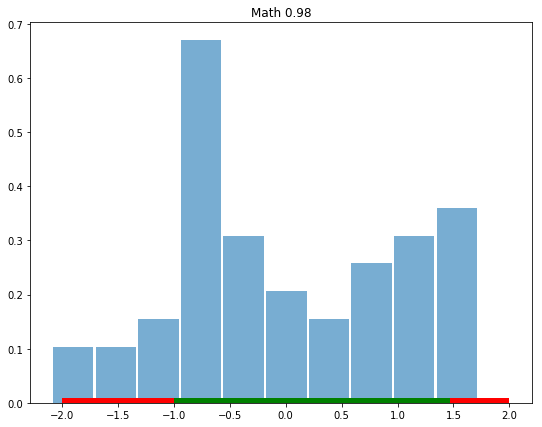

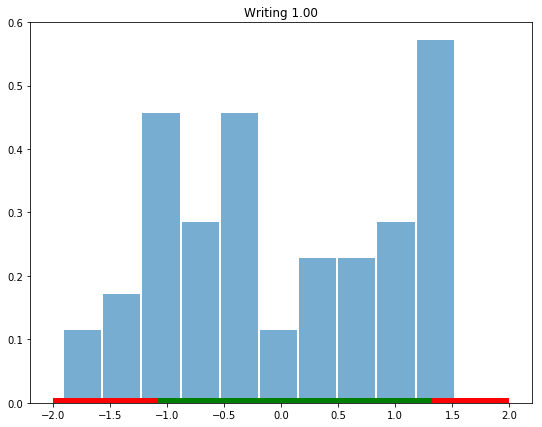

In [104]:
plot_standard_deviation_bounds(sat, 2)

So the mean does a good job summarizing data. 

### Example (Scatter-Plots)

Let us study the association of heights between parents and children. 

In [105]:
heights = pd.read_csv('heights.csv')
heights

,Average Parent Height,Child Height
0,75.43,73.2
1,75.43,69.2
2,75.43,69.0
3,75.43,69.0
4,73.66,73.5
...,...,...
929,66.64,64.0
930,66.64,62.0
931,66.64,61.0
932,65.27,66.5


We have a dataset consisting of 934 records. Each record indicates the height of a child and the average height of the parents. All heights are in inches. 

We can generate a scatter-plot with the `matplotlib` package. Remember that the alias is `plt`. 

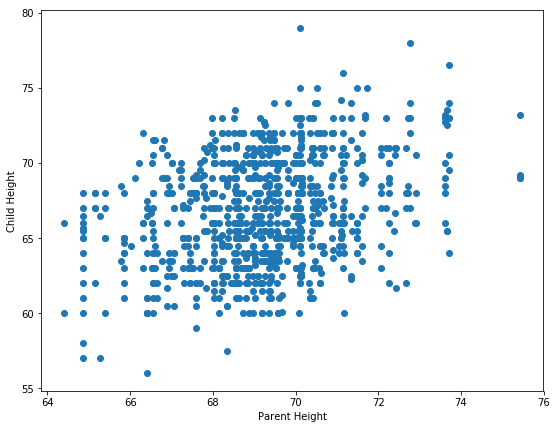

In [106]:
plt.scatter(heights['Average Parent Height'], heights['Child Height'])
plt.ylabel("Child Height")
plt.xlabel("Parent Height");

Note the labels on the axes. Usually we think of

- the variable on the horizontal axis as the independent variable
- the variable on the vertical axis as the dependent variable

So the variable on the horizontal axis should explain the variable on the vertical axis. This does not mean that the independent variable causes the dependent variable. However we tend to think of the independent variable as providing information about the patterns in the dependent variable. 

##### Jittering

Note that some of the points in the scatter-plot are overlapping. We can randomly move the points to have a more understandable visualization.

In [108]:
number_of_records = len(heights)

jittered_horizontal_coordinates = heights['Average Parent Height'] + np.random.rand(number_of_records)
jittered_vertical_coordinates = heights['Child Height'] + np.random.rand(number_of_records)

Here we have add a random number between 0 and 1

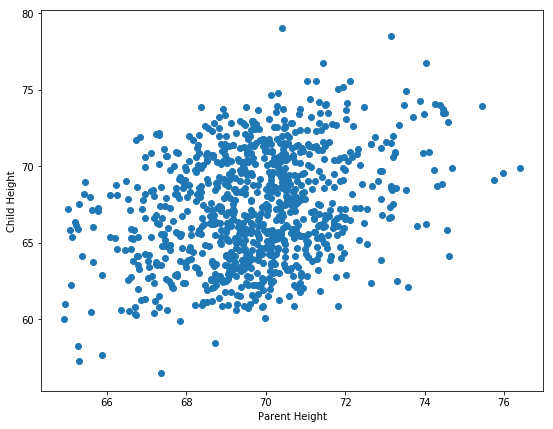

In [109]:
plt.scatter(jittered_horizontal_coordinates, jittered_vertical_coordinates)
plt.ylabel("Child Height")
plt.xlabel("Parent Height");

Note that the scatter-plot shows more records. However, the chart seems cluttered. We should instead generate random numbers between 0 and 10.

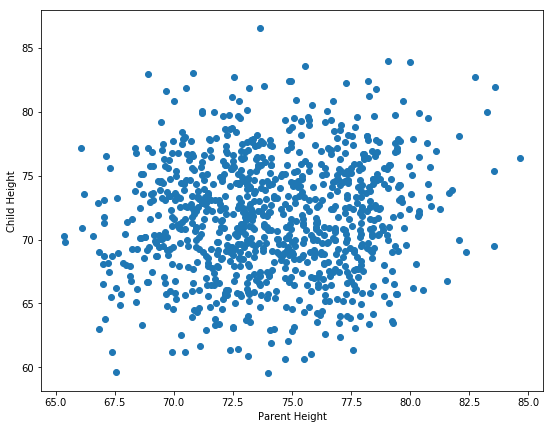

In [110]:
number_of_records = len(heights)

jittered_horizontal_coordinates = heights['Average Parent Height'] + 10 * np.random.rand(number_of_records)
jittered_vertical_coordinates = heights['Child Height'] + 10 * np.random.rand(number_of_records)

plt.scatter(jittered_horizontal_coordinates, jittered_vertical_coordinates)
plt.ylabel("Child Height")
plt.xlabel("Parent Height");

The scatter-plot has become less cluttered. However, we have changed the association between the variables. We lose both the trend and pattern.

##### Saturation

Instead of changing the coordinates of the points, we can adjust the saturation. So we make the point a little transparent. The darker regions come from points clustering together. 

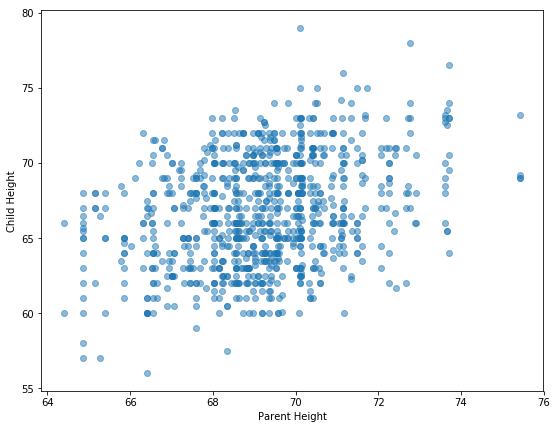

In [112]:
plt.scatter(heights['Average Parent Height'], heights['Child Height'], alpha=0.5)
plt.ylabel("Child Height")
plt.xlabel("Parent Height");

Here we set the `alpha` argument to 0.5

- values close to 1 are less transparent 
- values close to 0 are more transparent

So if we change to 0.25, then the points become more transparent.

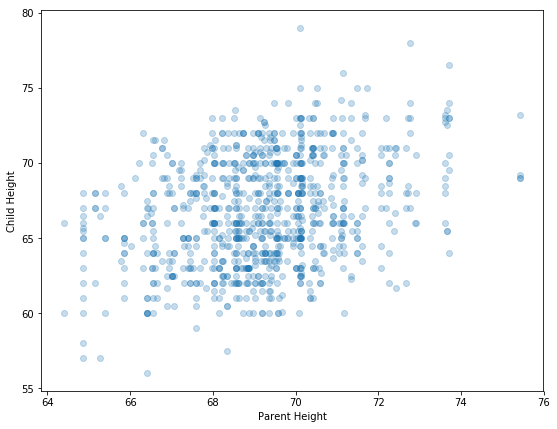

In [113]:
plt.scatter(heights['Average Parent Height'], heights['Child Height'], alpha=0.25)
plt.ylabel("Child Height")
plt.xlabel("Parent Height");

##### Grouping

We could try to change the dataset by grouping together records. We expect taller parents to have taller children and shorter parents to have shorter children. So maybe we can group together the records into 

- average parent height between 64 and 68 inches
- average parent height between 69 and 71 inches
- average parent height between 72 and 76 inches

Instead of one chart, we can have three charts

In [116]:
group_lower = heights[(64 <= heights['Average Parent Height']) & (heights['Average Parent Height'] <= 68)]
group_middle = heights[(68 < heights['Average Parent Height']) & (heights['Average Parent Height'] < 71)]
group_upper = heights[(71 <= heights['Average Parent Height']) & (heights['Average Parent Height'] <= 76)]

For each of these groups, we can compute the average height of children along with the median height of parents.

In [117]:
group_lower_mean = np.mean(group_lower["Child Height"])
group_middle_mean = np.mean(group_middle["Child Height"])
group_upper_mean = np.mean(group_upper["Child Height"])

group_lower_median = np.median(group_lower["Average Parent Height"])
group_middle_median = np.median(group_middle["Average Parent Height"])
group_upper_median = np.median(group_upper["Average Parent Height"])

Now we can plot the data along with the averages.

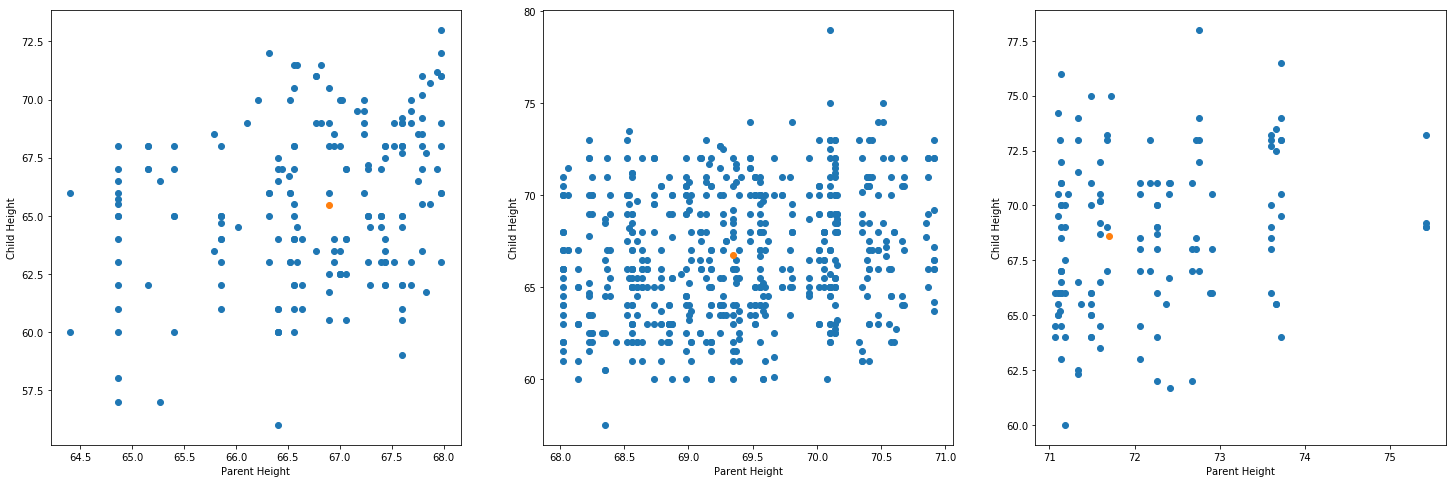

In [118]:
data = [group_lower, group_middle, group_upper]
means = [group_lower_mean, group_middle_mean, group_upper_mean]
medians = [group_lower_median, group_middle_median, group_upper_median]

fig, ax = plt.subplots(ncols=3, figsize = (25,8))

for i in range(3):
    ax[i].scatter(data[i]['Average Parent Height'], data[i]['Child Height'])
    ax[i].scatter(medians[i], means[i])
    ax[i].set_ylabel("Child Height")
    ax[i].set_xlabel("Parent Height");

Note that we have average values 

- 65
- 66
- 68 

across the three groups. So we see a positive trends matching our expectations. We can increase the number of groups to get a better understanding of the pattern. 

In [119]:
grouped_heights = summarize_groups(heights)
grouped_heights

,Average of Parent Height in Group,Average of Child Height in Group
Average Parent Height,,
"(64.399, 67.964]",66.90,65.316043
"(67.964, 68.85]",68.52,66.061026
"(68.85, 69.56]",69.27,66.785106
"(69.56, 70.48]",70.10,67.265761
"(70.48, 75.43]",71.35,68.401111


Now we can plot all of the data in one chart.

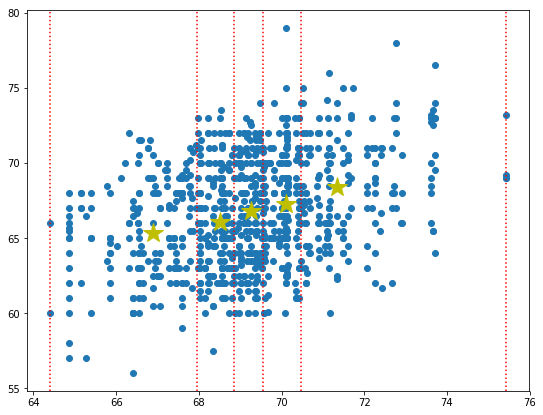

In [120]:
plt.scatter(heights['Average Parent Height'], heights["Child Height"])
plt.plot(grouped_heights["Average of Parent Height in Group"], grouped_heights["Average of Child Height in Group"], "y*", markersize = 20)

for index in grouped_heights.index:
    plt.axvline(x = index.left, color = "r", linestyle =":")

plt.axvline(x = grouped_heights.index[-1].right, color = "r", linestyle =":");

We see that the average heights have a pattern. We could imagine a line connecting the average heights across the five groups.

### Example (Correlation)

We use correlation to measure the association between variables with numbers. Before we calculate the correlation, we should understand the connection between the visualizations and the numbers. Below we have scatter-plots with correlations 

- 1 
- 0.5
- 0 
- -0.5
- -1

Note the trends and patterns in the data.

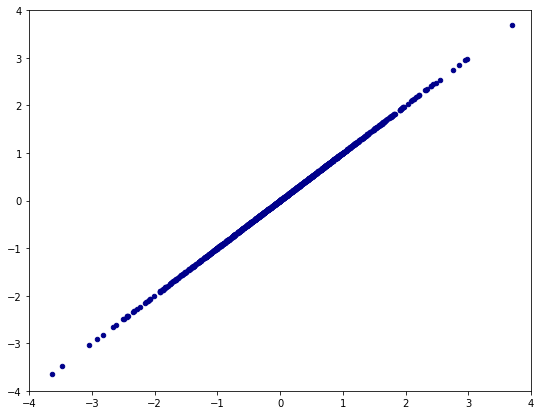

In [121]:
r_scatter(1)

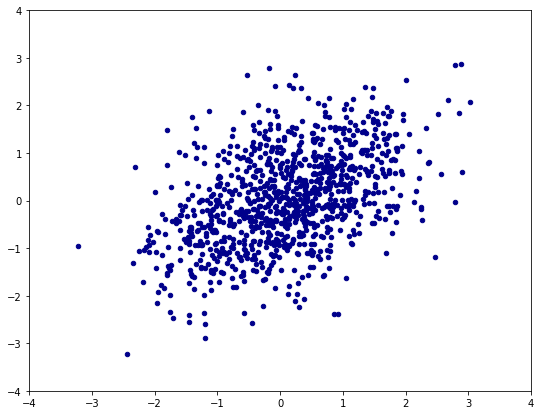

In [122]:
r_scatter(0.5)

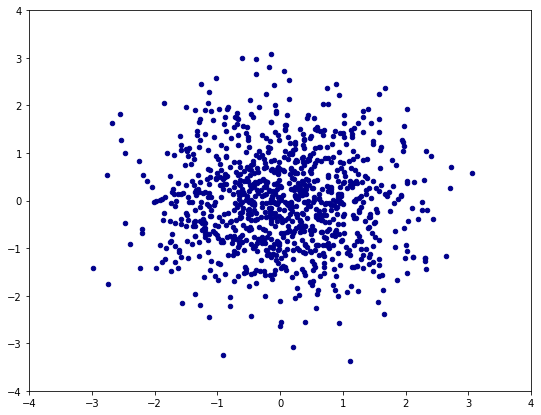

In [50]:
r_scatter(0)

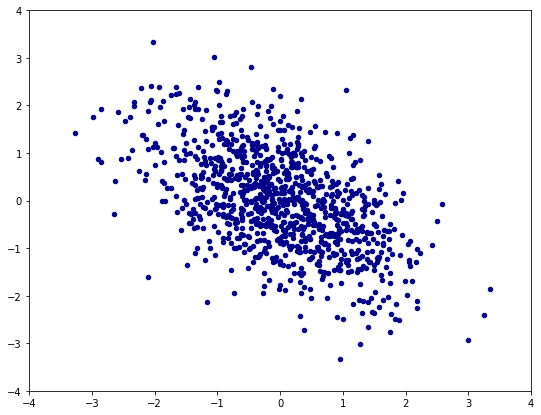

In [51]:
r_scatter(-0.5)

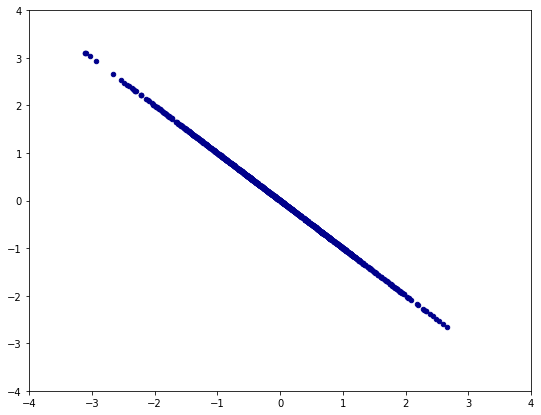

In [52]:
r_scatter(-1)

##### Calculating $r$

Suppose we have the following table of data.

In [123]:
table = pd.DataFrame(data = {
        'x': [1, 2, 3, 4, 5, 6],
        'y': [2, 3, 1, 5, 2, 7]})
table 

,x,y
0,1,2
1,2,3
2,3,1
3,4,5
4,5,2
5,6,7


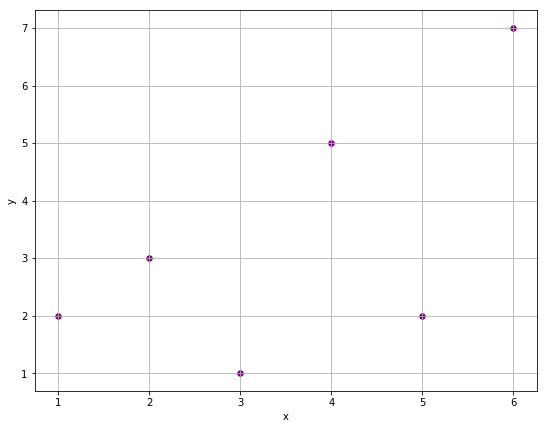

In [124]:
plt.scatter(table['x'], table['y'], s=30, color='purple')
plt.grid()
plt.xlabel("x")
plt.ylabel("y");

We can convert to standard units

In [125]:
table["x (standard units)"] = standard_units(table["x"])
table["y (standard units)"] = standard_units(table["y"])
table

,x,y,x (standard units),y (standard units)
0,1,2,-1.46385,-0.648886
1,2,3,-0.87831,-0.162221
2,3,1,-0.29277,-1.135550
3,4,5,0.29277,0.811107
4,5,2,0.87831,-0.648886
5,6,7,1.46385,1.784436


Now we can take the product of the entries in the columns containing standard units.

In [126]:
table["product of standard units"] =  table["y (standard units)"] * table["x (standard units)"]
table

,x,y,x (standard units),y (standard units),product of standard units
0,1,2,-1.46385,-0.648886,0.949871
1,2,3,-0.87831,-0.162221,0.142481
2,3,1,-0.29277,-1.135550,0.332455
3,4,5,0.29277,0.811107,0.237468
4,5,2,0.87831,-0.648886,-0.569923
5,6,7,1.46385,1.784436,2.612146


Having calculated the product, we can compute the average.

In [127]:
r = np.mean(table["product of standard units"])
r

0.6174163971897709

We can put the pieces together with a function called `compute_correlation`.

In [128]:
# compute correlation on table with columns x and y

def compute_correlation(table, x, y):    
    x_in_standard_units = standard_units(table["x"])
    y_in_standard_units = standard_units(table["y"])
    return np.mean(x_in_standard_units * y_in_standard_units)

In [129]:
compute_correlation(table, 'x', 'y')

0.6174163971897709

In [132]:
table[["x","y"]].corr()

,x,y
x,1.000000,0.617416
y,0.617416,1.000000


##### Switching Axes

Note that we can switch horizontal axis and vertical axis without changing the value of the correlation.

In [133]:
compute_correlation(table, 'y', 'x')

0.6174163971897709

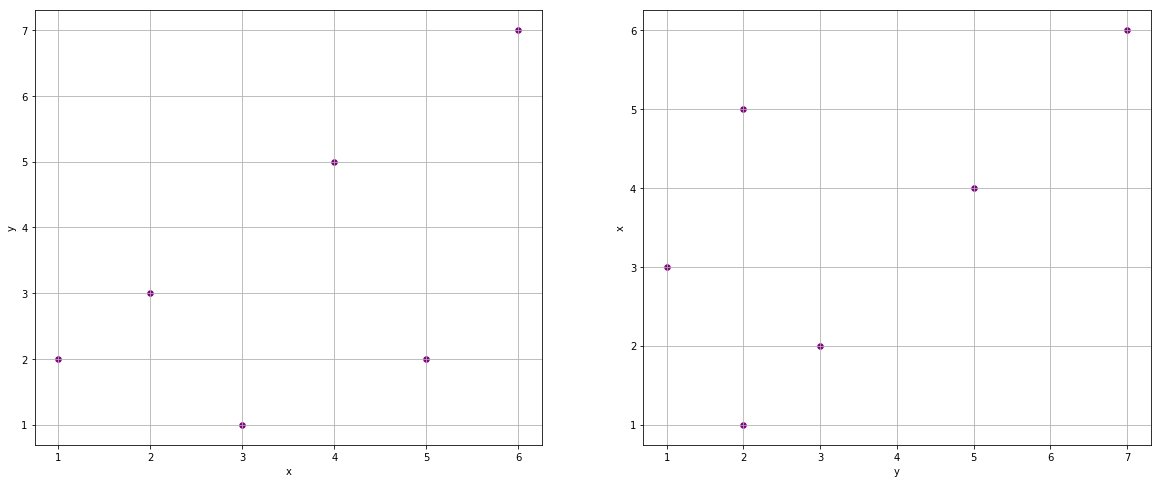

In [134]:
fig, ax = plt.subplots(ncols = 2, figsize = (20,8))

ax[0].scatter(table['x'], table['y'], s=30, color='purple')
ax[0].grid()
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")

ax[1].scatter(table['y'], table['x'], s=30, color='purple')
ax[1].grid()
ax[1].set_xlabel("y")
ax[1].set_ylabel("x");

##### Nonlinear Patterns

Suppose we had the following collection of data.

In [81]:
values = np.arange(-4,4.1, 0.5)
table = pd.DataFrame(data = {
        'x': values,
        'y': values**2})
table 

,x,y
0,-4.0,16.00
1,-3.5,12.25
2,-3.0,9.00
3,-2.5,6.25
4,-2.0,4.00
...,...,...
12,2.0,4.00
13,2.5,6.25
14,3.0,9.00
15,3.5,12.25


Note that we no longer have a linear pattern in the data.

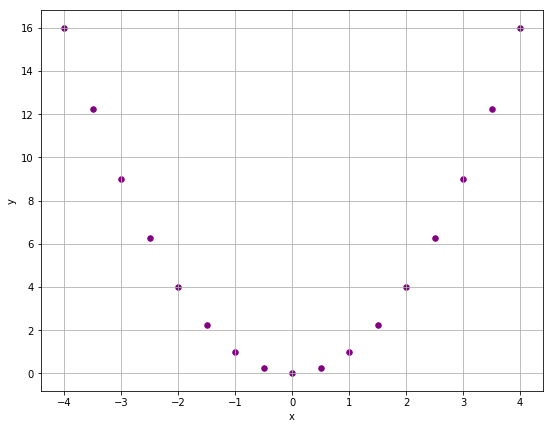

In [82]:
plt.scatter(table['x'], table['y'], s=30, color='purple')
plt.grid()
plt.xlabel("x")
plt.ylabel("y");

We can compute the correlation. The value is 0.

In [83]:
compute_correlation(table, 'x', 'y')

0.0

##### Outliers 

Note that outliers can throw off the value of the correlation.

In [84]:
table = pd.DataFrame(data = {
        'x': [1, 2, 3, 4],
        'y': [1, 2, 3, 4]})
table 

,x,y
0,1,1
1,2,2
2,3,3
3,4,4


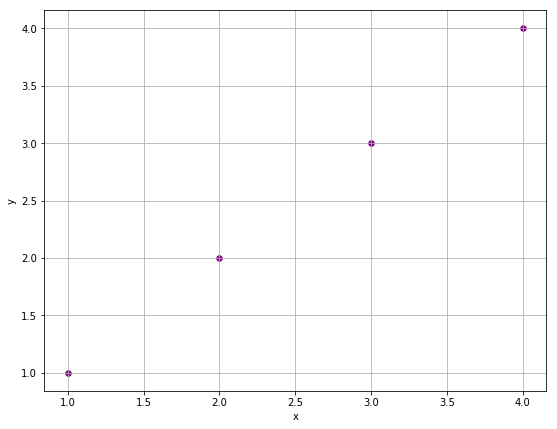

In [85]:
plt.scatter(table['x'], table['y'], s=30, color='purple')
plt.grid()
plt.xlabel("x")
plt.ylabel("y");

We find that the correlation is 1.

In [86]:
compute_correlation(table, 'x', 'y')

1.0

However, if we add an outlier, then the correlation will decrease.

In [87]:
table = pd.DataFrame(data = {
        'x': [1, 2, 3, 4, 5],
        'y': [1, 2, 3, 4, 0]})
table 

,x,y
0,1,1
1,2,2
2,3,3
3,4,4
4,5,0


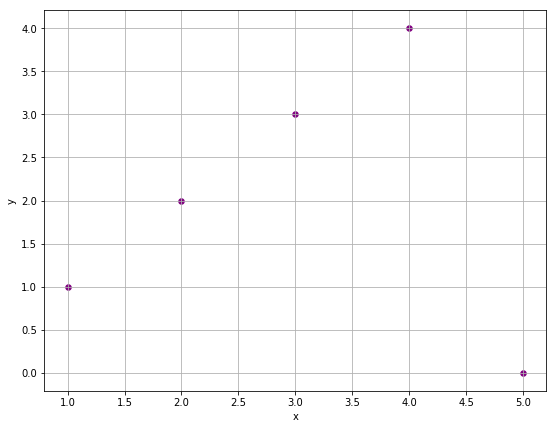

In [88]:
plt.scatter(table['x'], table['y'], s=30, color='purple')
plt.grid()
plt.xlabel("x")
plt.ylabel("y");

In [86]:
compute_correlation(table, 'x', 'y')

1.0

### Exercise (Correlation)

Compute the correlation between 

- father height and child height 
- mother height and child height

Generate scatter-plots to show the trend and pattern.

In [89]:
heights_extended = pd.read_csv('heights_extended.csv')
heights_extended

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,1,78.5,67.0,75.43,4,1,male,73.2
1,1,78.5,67.0,75.43,4,2,female,69.2
2,1,78.5,67.0,75.43,4,3,female,69.0
3,1,78.5,67.0,75.43,4,4,female,69.0
4,2,75.5,66.5,73.66,4,1,male,73.5
...,...,...,...,...,...,...,...,...
929,203,62.0,66.0,66.64,3,1,male,64.0
930,203,62.0,66.0,66.64,3,2,female,62.0
931,203,62.0,66.0,66.64,3,3,female,61.0
932,204,62.5,63.0,65.27,2,1,male,66.5
